# Hellman Compile
The following functions serve to compile trial-level data from Open Field Task (OFT) and Spatial Orientation Task (SOT) into participant-level summary data structures, which are then filtered for Quality-checked data, and combined with their Qualtrics counterparts.

## Functions
##### OFT Compile
##### SOT Compile
##### Hellman Compile

-------------------------------------------------------


First, load required R libraries and identify the directory containing the raw OFT, SOT, and Qualtrics data. For each task, store a list of valid filenames to iterate through, summarise, and concatenate.

In [257]:
library(tidyverse)
library(gridExtra)
library(Hmisc)
library(corrplot)


hellman_dir <- ("/mnt/chrastil/lab/data/Hellman/GoogleDrive/")
sot_dir <- paste0(hellman_dir, "SOT/")
oft_dir <- paste0(hellman_dir, "OFT/")

sot_filenames <- list.files(sot_dir)[!grepl("QC", list.files(sot_dir)) & grepl(".csv", list.files(sot_dir))]
oft_filenames <- list.files(oft_dir)[grepl("_objdistance.csv", list.files(oft_dir))]
oft_posnames <- list.files(oft_dir)[grepl("_position.csv", list.files(oft_dir))]

print(paste("SOT File total:", length(sot_filenames)))
print(paste("OFT File total:", length(oft_filenames)))

[1] "SOT File total: 331"
[1] "OFT File total: 298"


### OFT Compile
Here we iterate through each OFT trial-level file ("objdistance.csv"), extract summary stats, token ID and worker ID.

In [258]:
oft_compile <- function(oft_filenames, oft_dir){
    oft_compiled <- c()

    
    column_names <- "target_obj, trial_level, start_x, start_z, start_rot_y, end_x, end_z, end_rot_y, delta_start, delta_target, run_time, completion_time, tot_dist, tot_rot_y, sl_dist, efficiency, avg_speed"
    column_names <- c(strsplit(column_names, ", ")[[1]])
    
    for (i in 1:length(oft_filenames)){
        filename <- oft_filenames[i]
        
        # From Filename, get the worker ID and the Token ID
        w_ID <- strsplit(filename, "_")[[1]][1]
        t_ID <- strsplit(filename, "_")[[1]][2]
        
        filename <- paste0(oft_dir, filename)
        
        file <- read.csv(filename, header = FALSE, col.names = column_names)
        
        # Filter for only Test Trials
        test_trials <- file[grepl("Test", file$trial_level), c(9, 10, 12:17)]
        
        # Column Means and Column Standard Deviations. Add "mean" or "sd" prefix as appropriate.
        cm <- colMeans(test_trials, na.rm = TRUE)
        names(cm) <- paste0("mean_", names(cm))
        
        cv <- apply(test_trials, 2, sd, na.rm = TRUE)
        names(cv) <- paste0("sd_", names(cv))
        
        oft_row <- c(w_ID, t_ID, cm, cv)
        oft_compiled <- rbind(oft_compiled, oft_row)
    }
    # Convert to Data Frame and clean up data types
    oft_compiled <- as.data.frame(oft_compiled, row.names = FALSE, stringsAsFactors = FALSE)
    colnames(oft_compiled)[1:2] <- c("worker_ID", "OFT_token_ID")
    oft_compiled[, 3:ncol(oft_compiled)] <- lapply(oft_compiled[, 3:ncol(oft_compiled)], function(x) as.numeric(as.character(x)))
    
    return(oft_compiled)
}
                                                   

# Run it
oft_compiled <- oft_compile(oft_filenames, oft_dir)
write.csv(oft_compiled, "OFT_compiled.csv", row.names = FALSE)

### SOT Compile
Here we iterate through each SOT trial-level file ("SOT_"), extract summary stats, token ID and worker ID.

In [259]:
sot_compile <- function(sot_filenames, sot_dir){
    sot_compiled <- c()
    
    for (i in 1:length(sot_filenames)){
        filename <- sot_filenames[i]
        
        # From Filename, get the worker ID and the Token ID
        w_ID <- strsplit(filename, "_")[[1]][2]
        t_ID <- strsplit(strsplit(filename, "_")[[1]][3], ".csv")[[1]][1]
        
        filename <- paste0(sot_dir, filename)
        
        file <- read.csv(filename)
        
        # Filter for only Test Trials
        test_trials <- file[grepl("Test", file$trialType), c(7, 10, 11, 15, 16)]
        
        # Column Means and Column Standard Deviations. Add "mean" or "sd" prefix as appropriate.
        cm <- colMeans(test_trials, na.rm = TRUE)
        names(cm) <- paste0("mean_", names(cm))
        
        cv <- apply(test_trials, 2, sd, na.rm = TRUE)
        names(cv) <- paste0("sd_", names(cv))
        
        sot_row <- c(w_ID, t_ID, cm, cv)
        sot_compiled <- rbind(sot_compiled, sot_row)
    }
    # Convert to Data Frame and clean up data types
    sot_compiled <- as.data.frame(sot_compiled, row.names = FALSE, stringsAsFactors = FALSE)
    colnames(sot_compiled)[1:2] <- c("worker_ID", "SOT_token_ID")
    sot_compiled[, 3:ncol(sot_compiled)] <- lapply(sot_compiled[, 3:ncol(sot_compiled)], function(x) as.numeric(as.character(x)))
    
    return(sot_compiled)
}
                                                   

# Run it
sot_compiled <- sot_compile(sot_filenames, sot_dir)
write.csv(sot_compiled, "SOT_compiled.csv", row.names = FALSE)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/SOT_0000_0I2Z4Y9Q.csv'”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/SOT_A1BNGJBEWJS8WE_1OA6Z8PO.csv'”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/SOT_A1FVXS8IM5QYO8_UP0UKZ7F.csv'”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/SOT_A2LO2DX6H49KW_6GLY25Q7.csv'”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTab

### Hellman Compile
Here we filter SOT, OFT, and Qualtrics data for only workers who have completed all three tasks faithfully. Then we merge them by Worker ID into one larger Hellman Compiled data frame

In [314]:
hellman_compile <- function(OFT, SOT, qualtrics, hellman_dir){
    # Read in Accept-Reject sheet, modifying column names and removing the second column (empty column)
    ar_colnames <- c("worker_ID", "task", "token_ID", "accept_reject", "notes")
    ar_hellman <- read.csv(paste0(hellman_dir, "Hellman_Task_AcceptReject-IP.csv"))

    ar_hellman <- ar_hellman[, c(1, 3:6)]
    colnames(ar_hellman) <- ar_colnames
    
    # Obtain a list of unique and valid worker IDs (Begin with "A"), then filter to contain only those.
    unique_worker_ids <- unique(ar_hellman$worker_ID)[grep("A", unique(ar_hellman$worker_ID))]
    ar_hellman <- ar_hellman[ar_hellman$worker_ID %in% unique_worker_ids, ]

    # Clean up factors
    ar_hellman$accept_reject[ar_hellman$accept_reject == " "] <- '?'
    ar_hellman$accept_reject[ar_hellman$accept_reject == "reject "] <- 'reject'
    ar_hellman$accept_reject[ar_hellman$accept_reject == "not found"] <- 'reject'
    ar_hellman$accept_reject[ar_hellman$accept_reject == "acccept"] <- 'accept'
    ar_hellman$accept_reject[ar_hellman$accept_reject == "can't find"] <- "reject"
    ar_hellman$task[ar_hellman$task == "Qualtrics "] <- 'Qualtrics'
    ar_hellman$task[ar_hellman$task == "Qualitrics "] <- 'Qualtrics'
    ar_hellman$task[ar_hellman$task == "Qualitrics"] <- 'Qualtrics'


    ar_hellman$accept_reject <- as.factor(ar_hellman$accept_reject)
    ar_hellman$task <- as.factor(ar_hellman$task)

    # Filter ar_hellman for only accepted data, and only for workerIDs who have 
    #   all three tasks accepted

    filtered_hellman <- ar_hellman %>% filter(accept_reject == 'accept')
    comp_hellman <- filtered_hellman %>% group_by(worker_ID) %>% count() %>% filter(n >= 3)
    comp_workerIDs <- unique(comp_hellman$worker_ID)

    filtered_hellman <- filtered_hellman %>% filter(worker_ID %in% comp_workerIDs)
    
    # Rename columsn in Qualtrics data
    colnames(qualtrics)[19] <- "worker_ID"
    colnames(qualtrics)[298] <- "token_ID"

    # Clean Qualtrics data
    qualtrics <- qualtrics %>% filter(grepl("A", worker_ID))

    # Split filtered hellman Accept-Reject into OFT, SOT, and Qualtrics. Modify tokenID names for ease of merging
    fh_sot <- filtered_hellman %>% filter(task == 'SOT')
    fh_oft <- filtered_hellman %>% filter(task == 'OFT')
    fh_qualtrics <- filtered_hellman %>% filter(task == 'Qualtrics')
    
    colnames(fh_sot)[3] <- "SOT_token_ID"
    colnames(fh_oft)[3] <- "OFT_token_ID"

    # Merge Data, remove unaccepted entries, remove duplicates
    OFT_merge <- merge(fh_oft, OFT, by = c("worker_ID", "OFT_token_ID"), all.x = TRUE, all.y = TRUE)
    SOT_merge <- merge(fh_sot, SOT, by = c("worker_ID", "SOT_token_ID"), all.x = TRUE, all.y = TRUE)
    Q_merge <- merge(fh_qualtrics, qualtrics, by = c("worker_ID", "token_ID"), all.x = TRUE, all.y = TRUE)

    OFT_merge <- OFT_merge %>% filter(accept_reject == 'accept')
    SOT_merge <- SOT_merge %>% filter(accept_reject == 'accept')
    Q_merge <- Q_merge %>% filter(accept_reject == 'accept')

    OFT_merge <- OFT_merge %>% filter(!duplicated(worker_ID))
    SOT_merge <- SOT_merge %>% filter(!duplicated(worker_ID))
    Q_merge <- Q_merge %>% filter(!duplicated(worker_ID))
    
    # Merge the merged data into one master file
    Hellman <- merge(OFT_merge, SOT_merge, by = "worker_ID", all.x = TRUE, all.y = TRUE)
    Hellman <- merge(Hellman, Q_merge, by = "worker_ID", all.x = TRUE, all.y = TRUE)


    colnames(Hellman)[grep("SC", colnames(Hellman))] <- paste0("SC_", c("Demographics", "AES", "AQ-10", 
                                                  "AUDIT", "BIS-11", "EAT-26", 
                                                  "O-LIFE", "OCI-R", "SBSOD", 
                                                  "SDS", "STAI-TY2", 
                                                  "VideoGameQuestionnaire"))
    write.csv(Hellman, "Hellman_compiled.csv", row.names = FALSE)
    return(Hellman)
}

# Read in the most up-to-date qualtrics file
qualtrics <- read.csv(paste0(hellman_dir, "Qualtrics_February 9, 2021_13.45.csv"), stringsAsFactors = FALSE)

hellman_compiled <- hellman_compile(oft_compiled, sot_compiled, qualtrics, hellman_dir)

# Data Visualization
Now with the quality-checked, filtered, and compiled data from all tasks in Hellman (OFT, SOT, Qualtrics) we can look at trends in task performances.

Warning message:
“Removed 25 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 25 rows containing non-finite values (stat_density).”
Warning message:
“Removed 22 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 22 rows containing non-finite values (stat_density).”


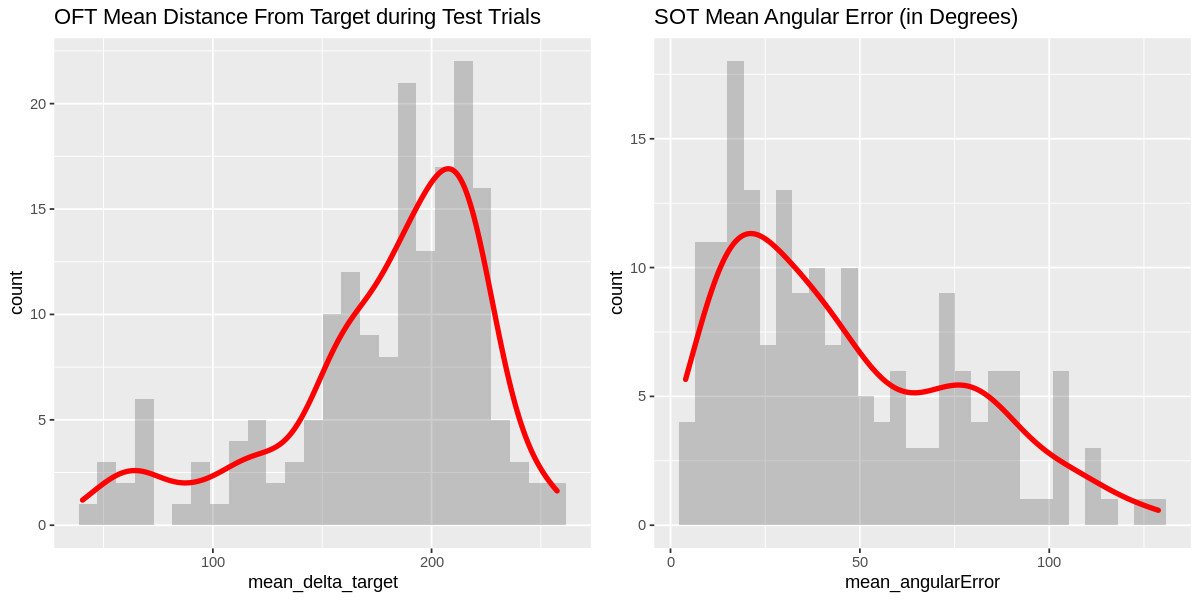

In [307]:
oftmean <- ggplot(hellman_compiled, aes(x = mean_delta_target)) +
  geom_histogram(alpha = 0.3, binwidth = max(hellman_compiled$mean_delta_target, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(hellman_compiled$mean_delta_target, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("OFT Mean Distance From Target during Test Trials")

sotmean <- ggplot(hellman_compiled, aes(x = mean_angularError)) +
  geom_histogram(alpha = 0.3, binwidth = max(hellman_compiled$mean_angularError, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(hellman_compiled$mean_angularError, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Mean Angular Error (in Degrees)")



options(repr.plot.width=10, repr.plot.height=5)

grid.arrange(oftmean, sotmean, ncol = 2)

options(warn=1)

In [ ]:
soft <- ggplot(hellman_compiled, aes(x = mean_delta_target, y = mean_angularError)) +
            geom_point() + geom_smooth(method=lm)

soft
str(hellman_compiled, list.len = ncol(hellman_compiled))

### Correlation Matrix Plot
Now let's look broadly at correlations between all the different task performances and questionnaire metrics. We'll display their significance level, too.

In [408]:
str(Hellman_subset)

'data.frame':	201 obs. of  19 variables:
 $ OFT Mean Dist. from Start: num  181 NA 123 167 220 ...
 $ OFT Mean Dist. to Target : num  157.6 NA 214.4 212.1 68.7 ...
 $ OFT Mean Comp. Time      : num  23.4 NA 25 21.4 22.2 ...
 $ OFT Mean Dist. Traveled  : num  268 NA 132 247 250 ...
 $ OFT Mean Rotation        : num  1257 NA 208 803 858 ...
 $ SOT Mean Ang. Error      : num  81.94 NA 61.81 8.22 9.04 ...
 $ SOT Mean Resp. Time      : num  69.2 NA 23 17.7 15.6 ...
 $ SC_Demographics          : num  6 9 6 4 6 5 5 6 6 6 ...
 $ SC_AES                   : num  38 28 32 25 42 18 20 27 20 18 ...
 $ SC_AQ-10                 : num  3 1 3 7 10 0 0 4 1 0 ...
 $ SC_AUDIT                 : num  1 1 0 1 14 0 0 7 6 3 ...
 $ SC_BIS-11                : num  54 51 49 48 65 54 44 62 39 42 ...
 $ SC_EAT-26                : num  2 7 6 11 12 6 7 13 3 5 ...
 $ SC_O-LIFE                : num  1 11 11 9 27 1 3 15 3 2 ...
 $ SC_OCI-R                 : num  13 3 13 22 31 0 4 20 1 0 ...
 $ SC_SBSOD                 :

In [317]:
# Analysis
options(scipen=999)
sc_indices <- grep("SC", colnames(hellman_compiled))
SOFT_indices <- grep("mean", colnames(hellman_compiled))
Hellman_subset <- Hellman[, c(SOFT_indices, sc_indices)]
colnames(Hellman_subset)

[1] "mean_delta_start"          "mean_delta_target"        
 [3] "mean_completion_time"      "mean_tot_dist"            
 [5] "mean_tot_rot_y"            "mean_sl_dist"             
 [7] "mean_efficiency"           "mean_avg_speed"           
 [9] "mean_mouseDist"            "mean_angularError"        
[11] "mean_pctAngularError"      "mean_reactionTime"        
[13] "mean_responseTime"         "SC_Demographics"          
[15] "SC_AES"                    "SC_AQ-10"                 
[17] "SC_AUDIT"                  "SC_BIS-11"                
[19] "SC_EAT-26"                 "SC_O-LIFE"                
[21] "SC_OCI-R"                  "SC_SBSOD"                 
[23] "SC_SDS"                    "SC_STAI-TY2"              
[25] "SC_VideoGameQuestionnaire"

'data.frame':	201 obs. of  25 variables:
 $ OFT Mean Dist. from Start: num  181 NA 123 167 220 ...
 $ OFT Mean Dist. to Target : num  157.6 NA 214.4 212.1 68.7 ...
 $ OFT Mean Comp. Time      : num  23.4 NA 25 21.4 22.2 ...
 $ OFT Mean Dist. Traveled  : num  268 NA 132 247 250 ...
 $ OFT Mean Rotation        : num  1257 NA 208 803 858 ...
 $ OFT Mean SL Dist.        : num  241 NA 241 241 241 ...
 $ OFT Mean Efficiency      : num  1.241 NA 0.634 1.121 1.057 ...
 $ OFT Mean Avg. Speed      : num  5392 NA 5500 5168 9982 ...
 $ SOT Mean Mouse Dist.     : num  4.62 NA 4.54 5.02 6.47 ...
 $ SOT Mean Ang. Error      : num  81.94 NA 61.81 8.22 9.04 ...
 $ SOT Mean Error %         : num  0.4552 NA 0.3434 0.0457 0.0502 ...
 $ SOT Mean React Time      : num  67.6 NA 22.1 16.6 13.9 ...
 $ SOT Mean Resp. Time      : num  69.2 NA 23 17.7 15.6 ...
 $ SC_Demographics          : num  6 9 6 4 6 5 5 6 6 6 ...
 $ SC_AES                   : num  38 28 32 25 42 18 20 27 20 18 ...
 $ SC_AQ-10                

Warning message in seq.int(0, 1, length.out = n):
“first element used of 'length.out' argument”


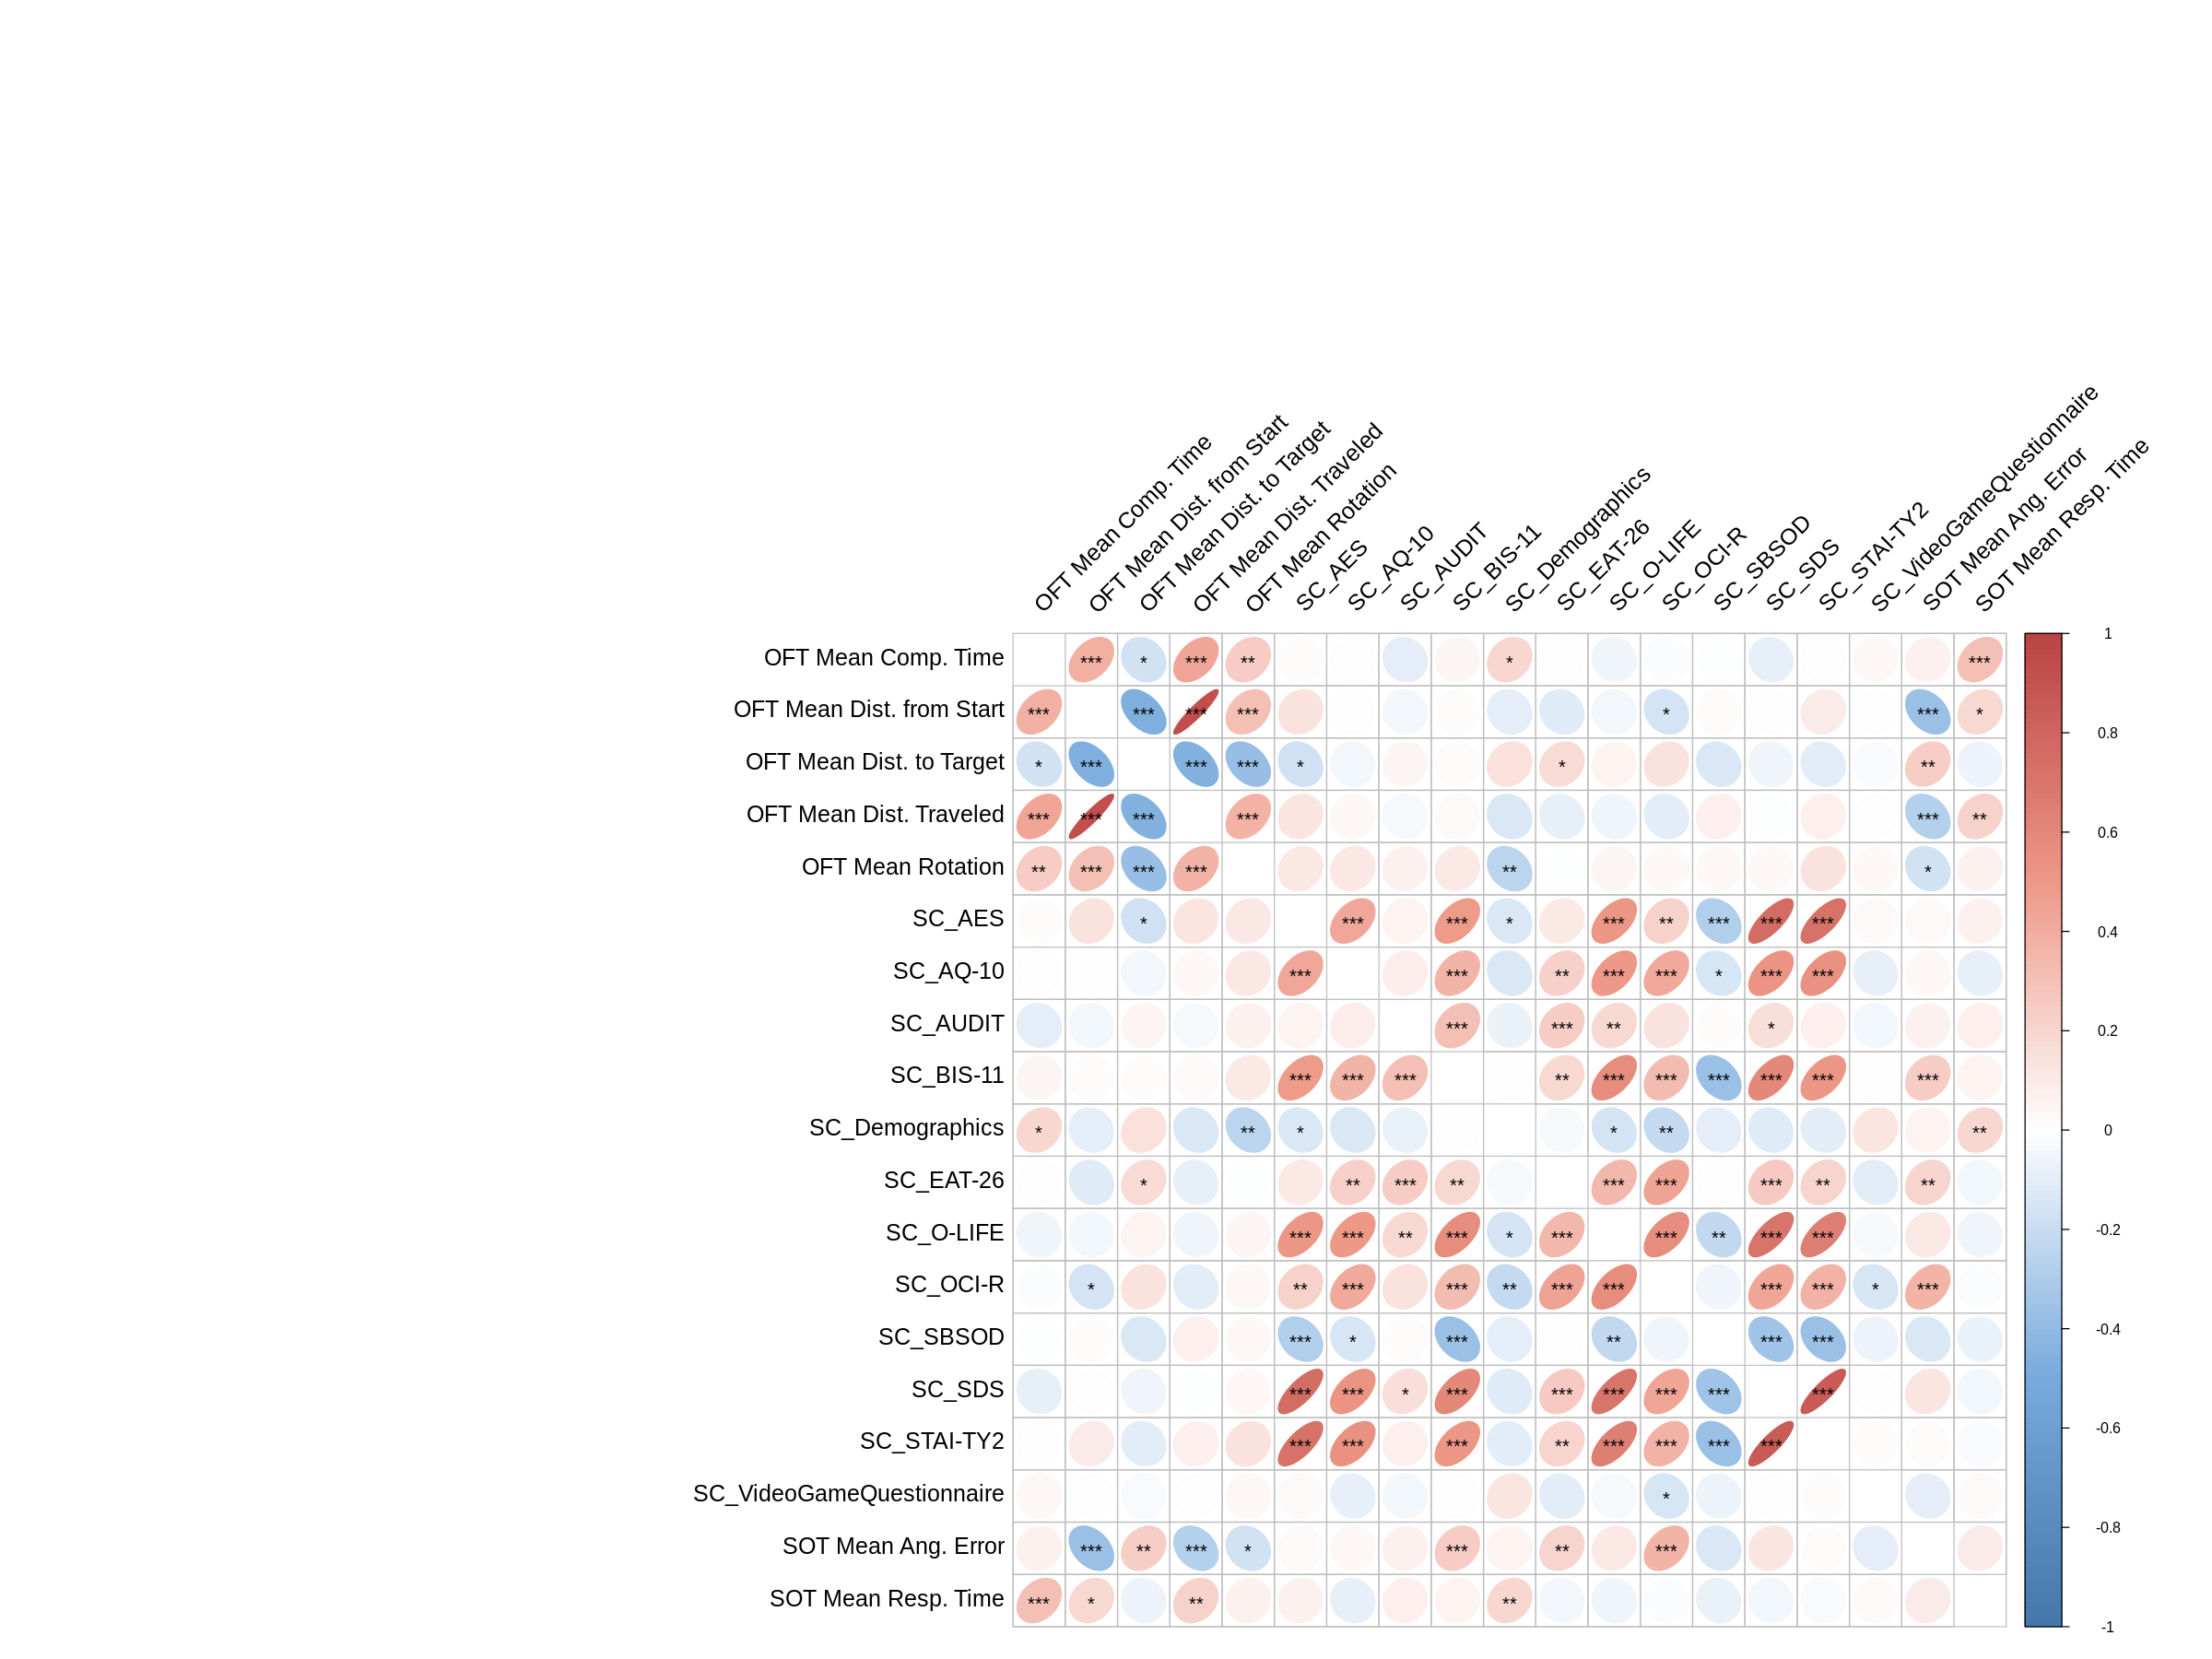

In [358]:
# Analysis
options(scipen=999)
sc_indices <- grep("SC", colnames(hellman_compiled))
SOFT_indices <- grep("mean", colnames(hellman_compiled))
Hellman_subset <- hellman_compiled[, c(SOFT_indices, sc_indices)]

colnames(Hellman_subset)[1:length(SOFT_indices)] <- c('OFT Mean Dist. from Start',
                             'OFT Mean Dist. to Target',
                             'OFT Mean Comp. Time',
                             'OFT Mean Dist. Traveled',
                             'OFT Mean Rotation',
                             'OFT Mean SL Dist.',
                             'OFT Mean Efficiency',
                             'OFT Mean Avg. Speed',
                             'SOT Mean Mouse Dist.',
                             'SOT Mean Ang. Error',
                             'SOT Mean Error %',
                             'SOT Mean React Time',
                             'SOT Mean Resp. Time')

indx <- sapply(Hellman_subset, is.character)
Hellman_subset[indx] <- lapply(Hellman_subset[indx], function(x) as.numeric(x))
print(str(Hellman_subset))
Hellman_subset$SC_SBSOD <- 120 - Hellman_subset$SC_SBSOD

Hellman_subset <- Hellman_subset[c(1:5, 10, 13:ncol(Hellman_subset))]

hellman_corr <- rcorr(as.matrix(Hellman_subset), type = "pearson")

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
  )
}

hellman_flatcorr <- flattenCorrMatrix(hellman_corr$r, hellman_corr$P)
hellmat <- hellman_flatcorr[complete.cases(hellman_flatcorr), ]

hell_sig <- hellmat[hellmat$p < 0.05, ]
hs <- hell_sig[grepl('SC', hell_sig$row) | grepl('SC', hell_sig$column), ]

col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF", "#EE9988", "#BB4444"))

options(repr.plot.width=20, repr.plot.height=15)
corrplot(hellman_corr$r, method="ellipse", col=col(200),  
         type="full", order='alphabet',
# Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         p.mat = hellman_corr$P, insig = "label_sig", sig.level = c(0.001, 0.01, 0.05), pch.cex = 1,
         
         # hide correlation coefficient on the principal diagonal
         diag=FALSE, tl.cex = 1.25, number.cex = 0.8
         
)

In [ ]:
# LOOP THROUGH LIST OF X AND Y VARS
options(warn=-1)
X = c("`SOT Mean Ang. Error`", "`SOT Mean Ang. Error`", "`SC_SBSOD`", "`SC_SBSOD`", "`SC_SBSOD`", "`SC_SBSOD`", "`OFT Mean Dist. to Target`")
Y = c("`SC_OCI-R`", "`SC_BIS-11`", "`SC_SDS`", "`SC_O-LIFE`", "`SC_BIS-11`", "`SC_AES`", "`SOT Mean Ang. Error`")

library(ggplot2)
options(repr.plot.width=7, repr.plot.height=5)

for (i in 1:length(X)){
    g <- ggplot(Hellman_subset, aes_string(x = X[i], y = Y[i])) +
            geom_point() + geom_smooth(method=lm) 
    print(g)
}

for (i in 1:length(X)){
    x <- str_remove_all(X[i], "`")
    y <- str_remove_all(Y[i], "`")

    r <- rcorr(Hellman_subset[ , x], Hellman_subset[ , y], type = 'pearson')$r[2]
    P <- rcorr(Hellman_subset[ , x], Hellman_subset[ , y], type = 'pearson')$P[2]
    
    print(paste(Y[i], "~", X[i]))
    print(paste("     R:", r))
    print(paste("     p:", P))
    print("--------------------------------------------------")

   
}
options(warn=0)

In [ ]:
library(tidyverse)

# Get directory, filenames, and QC'd data
oft_dir <- paste0(hellman_dir, "OFT/")
oft_posnames <- list.files(oft_dir)[grepl("_position.csv", list.files(oft_dir))]
hellman_compiled <- read.csv("/mnt/chrastil/lab/data/Hellman/Hellman_compiled.csv")

# Function to plot OFT paths
OFTpaths <- function(filename_string){
  posdata <- read.csv(filename_string, header = FALSE)
  colnames(posdata) <- c("pos_x", "pos_z", "rot_y", 
            "run_time", "trial_time",
            "target_obj", "trial_level", 
            "deltaTarget",  "deltaStart", 
            "fps.m_Speed", "totalDistanceTraveled", 
            "tdrAngle", "target_visible")
  
  posdata <- posdata %>% mutate(trial_type = substr(trial_level, 1, 5))
  posdata$trial_type <- as.factor(posdata$trial_type)
    
  posdata <- posdata[posdata$trial_type == "TestS", ]
  
  
  g <- ggplot(data = posdata, mapping = aes(x = pos_x, y = pos_z, group = trial_level, color = target_obj, linetype = trial_type))
  g <- g + geom_path(size = 1, arrow = arrow(angle = 20, length = unit(0.1, "inches"), type = "closed"))
  g <- g+ facet_wrap(vars(target_obj), nrow = 2)
  
  g <- g + scale_linetype_manual(values=c("solid", "longdash", "dotted"))
  
  cone <- geom_point(aes(x = 98425.07, y = -1010.915), size = 5, color = "blue")
  bucket <- geom_point(aes(x = 98685.8, y = -1060.1), size = 5, color = "red")
  chair <- geom_point(aes(x = 98541, y = -866), size = 5, color = "green")
  soccerball <- geom_point(aes(x = 98689.8, y = -832), size = 5, color = "purple")
  
  g <- g + soccerball + bucket + cone + chair
  g <- g + coord_fixed(ratio = 1)
  return(g)
}

# Get list of QC'd OFT data, and plot them 1 by one
QC_posnames <- paste0(oft_dir, hellman_compiled$worker_ID, "_", hellman_compiled$OFT_token_ID, "_position.csv")
options(repr.plot.width=20, repr.plot.height=14)

# Loop through filenames and try to print the OFTpath
for (i in 1:length(QC_posnames)){
    
    print(QC_posnames[i])
    try(temp_plot <- OFTpaths(QC_posnames[i]), silent = TRUE)
    filename <- paste0("OFT_plots/", hellman_compiled$worker_ID[i], "_", hellman_compiled$OFT_token_ID[i], "plot.png")
    ggsave(temp_plot, file=filename, width = 14, height = 10, units = "cm")
}
